### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the quality of milk. You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

**Import Necessary Libraries**

In [2]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Task 1: Data Preparation and Exploration

1. Import the data from the `"milk_quality_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the target variable `grade` by mapping it to numbers `(low = 0, medium = 1, high = 2)`.
6. Visualize the distribution of key features `(ph, temperature)` using histograms.

In [3]:
# Step 1: Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'
df = pd.read_csv('milk_quality_data.csv')

# Step 2: Display the number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print(df.head())


Shape of the dataset: (1059, 8)
    ph  temperature  taste  odor  fat  turbidity  colour   grade
0  6.6           35      1     0    1          0     254    high
1  6.6           36      0     1    0          1     253    high
2  8.5           70      1     1    1          1     246     low
3  9.5           34      1     1    0          1     255     low
4  6.6           37      0     0    0          0     255  medium


In [4]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64


In [5]:
# Step 5: Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
# Step 5: Encode the target variable 'grade'
grade_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['grade'] = df['grade'].map(grade_mapping)

# Verify the mapping
print(df['grade'].value_counts())

grade
0    429
1    374
2    256
Name: count, dtype: int64


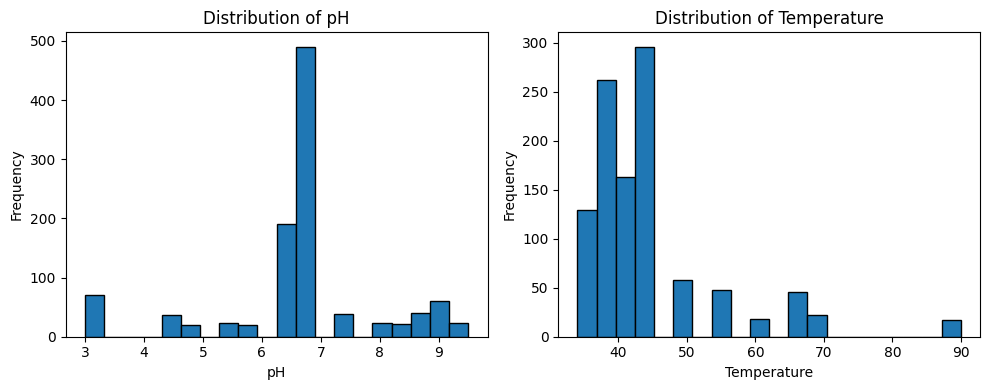

In [6]:
# Step 6: Visualize the distribution of key features ('ph', 'temperature') using histograms
import matplotlib.pyplot as plt

# Step 6: Visualize the distribution of 'ph'
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['ph'], bins=20, edgecolor='black')
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')

# Visualize the distribution of 'temperature'
plt.subplot(1, 2, 2)
plt.hist(df['temperature'], bins=20, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Task 2: Model Training Using Basic Models

1. Select the features `(ph, temperature, taste, odor, fat, turbidity, colour)` and the target variable `(grade)` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Logistic Regression model using the training data.
4. Print the model's accuracy score on test data.
5. Initialize and train a Decision Tree Classifier using the training data.
6. Print the model's accuracy score on test data.

In [7]:
from sklearn.model_selection import train_test_split

# Step 1: Select the features and target variable for modeling
# (Assuming all columns except 'grade' are features)
X = df.drop('grade', axis=1)
y = df['grade']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Check the shape of splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (741, 7)
Test set shape: (318, 7)


In [8]:
# Step 3: Initialize and train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 4: Print the model's accuracy score on test data
accuracy = logreg.score(X_test, y_test)
print("Logistic Regression Accuracy on Test Data:", accuracy)


Logistic Regression Accuracy on Test Data: 0.7012578616352201


In [9]:
# Step 5: Initialize and train a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Step 6: Print the model's accuracy score on test data
dtree_accuracy = dtree.score(X_test, y_test)
print("Decision Tree Classifier Accuracy on Test Data:", dtree_accuracy)

Decision Tree Classifier Accuracy on Test Data: 0.9937106918238994


### Task 3: Model Training Using Advanced Models

1. Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data.
2. Print the model's accuracy score on test data.
3. Initialize and train an XGBoost Classifier with 50 estimators using the training data.
4. Print the model's accuracy score on test data.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Initialize and train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbc.fit(X_train, y_train)

# Step 2: Print the model's accuracy score
gbc_accuracy = gbc.score(X_test, y_test)
print("Gradient Boosting Classifier Accuracy on Test Data:", gbc_accuracy)


Gradient Boosting Classifier Accuracy on Test Data: 0.9905660377358491


In [11]:
from xgboost import XGBClassifier

# Step 3: Initialize and train an XGBoost Classifier
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Step 4: Print the model's accuracy score
xgb_accuracy = xgb.score(X_test, y_test)
print("XGBoost Classifier Accuracy on Test Data:", xgb_accuracy)

XGBoost Classifier Accuracy on Test Data: 0.9968553459119497


### Task 4: Experiment with Hyperparameters in XGBoost

1. Train the XGBoost model with the following parameters
    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5.

Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Evaluate the model's performance using accuracy score and print it.
3. Print the classification report and confusion matrix for the model.

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 1: Train the XGBoost model with given hyperparameters
xgb_tuned = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_tuned.fit(X_train, y_train)

# Step 2: Evaluate the model's performance
y_pred = xgb_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Tuned Model Accuracy on Test Data:", accuracy)

XGBoost Tuned Model Accuracy on Test Data: 0.9968553459119497


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict using the tuned XGBoost model
y_pred = xgb_tuned.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

Confusion Matrix:
[[114   1   0]
 [  0 127   0]
 [  0   0  76]]
